<a href="https://colab.research.google.com/github/ashikshafi08/Kaggle_Competitions/blob/main/feedback_prize_essay/NBME_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/');

Mounted at /content/drive/


Have these files inside your file directory. 


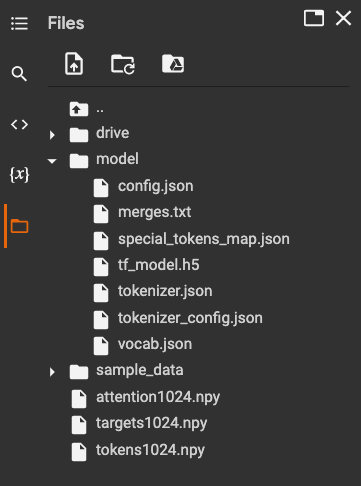

In [2]:
# Installing the hugging face library
!pip install transformers

     |████████████████████████████████| 3.5 MB 26.7 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 895 kB 51.8 MB/s 
     |████████████████████████████████| 6.5 MB 54.6 MB/s 
     |████████████████████████████████| 596 kB 52.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [8]:
# Specifying the path for the data filees 

train_files_path = '/content/drive/MyDrive/Kaggle_Competition/feedback_prize_eval/train/'
test_files_path = '/content/drive/MyDrive/Kaggle_Competition/feedback_prize_eval/test/'
train_csv_path = '/content/drive/MyDrive/Kaggle_Competition/feedback_prize_eval/train.csv'

# Importing the libs we need 
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import tensorflow as tf
import transformers
#from transformers import *
from tensorflow.keras import layers 


# Veiwing the first few examples of the train dataframe

train_df = pd.read_csv(train_csv_path)
train_df.head(10)

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
5,423A1CA112E2,1.622628e+12,887.0,1150.0,That's why there's a thing that's called no te...,Evidence,Evidence 3,163 164 165 166 167 168 169 170 171 172 173 17...
6,423A1CA112E2,1.622628e+12,1151.0,1533.0,Sometimes on the news there is either an accid...,Evidence,Evidence 4,211 212 213 214 215 216 217 218 219 220 221 22...
7,423A1CA112E2,1.622628e+12,1534.0,1602.0,Phones are fine to use and it's also the best ...,Claim,Claim 2,282 283 284 285 286 287 288 289 290 291 292 29...
8,423A1CA112E2,1.622628e+12,1603.0,1890.0,If you go through a problem and you can't find...,Evidence,Evidence 5,297 298 299 300 301 302 303 304 305 306 307 30...
9,423A1CA112E2,1.622628e+12,1891.0,2027.0,The news always updated when people do somethi...,Concluding Statement,Concluding Statement 1,355 356 357 358 359 360 361 362 363 364 365 36...


In [10]:
# Looking in to the firrst few examples of the train files and reading a random txt file 

import random 

random_path = train_files_path + random.choice(os.listdir(train_files_path))
file_ = open(random_path)
file_.readlines()



["Venus' average temperature of over eight hundred, clouds of sulfuric acid, and great atmospheric pressure makes it highly unlikey for inhabbitting. Despite these conditions, it is considered Earth's twin. This is because of the similar size and density of the two planets. For these reasons, and more, the exploration of Venus has been attempted. But what makes dangers of traveling there worth what could be found? Is this topic done justice from by the author?\n",
 '\n',
 'What would make the danger of going to Venus worth it? In paragraph four, the author states "Astronomers are fascinated by Venus because it may well once been the most Earth-like [...] a crucial consideration given the long time frames of space travel." In the sentences taken from the article, the author mentions how Venus is covered in mountains, valleys, craters, and how there is a possibility of it being covered by ocean many, many years before hand. Right after, the author says that there have been theories about

#### Things that are about to be here, 
- We gonna use LongFormer as an backbone 
- Use a NER Formulation 
- one fold of cv 


Make changes that will convert this problem into a Question-Answering format and we can try with different backbones of the model. 

Since its an one fold it trains with 90% of the data and validates on 10% of the rest available data. 

Furthermore we can convert this thing into a K-Fold cross and train on 100% data with proper LB. 

To know more about LongFormer. (https://huggingface.co/docs/transformers/model_doc/longformer)

In a nutshell, 
- its similar to Roberta but can accept inputs as wide as 4096 tokens. 

In [11]:
# Initializing certain hyper parameters 


# Version for saving the model weights 
VER = 12 

# Load tokens from already trained model (or something like that)
#LOAD_TOKENS_FROM = ''

# If the variable sets to be None then we will download a tokenizer from the internet and also train a new model. 


# Downloading the model 
# If the downlaoded model path is none then create a new path and download the model in it 
DOWNLOADED_MODEL_PATH = None 
if DOWNLOADED_MODEL_PATH is None:
  DOWNLOADED_MODEL_PATH = 'model'

# Specifying the model name that has to be downloaded 
MODEL_NAME = 'allenai/longformer-base-4096'

# Imports that needed to be done in order to download the helper class from HuggingFace 
from transformers import AutoConfig, AutoTokenizer , TFAutoModel

# Download the model from hugging face 
if DOWNLOADED_MODEL_PATH == 'model':
  # make a dir with that name 
  os.mkdir('model')

  # Download the tokenizer for the longformer 
  tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
  # Saving it as pre-trained model to a folder 
  tokenizer.save_pretrained('model')

  # Downloading the configuration files for this transformer model 
  config = AutoConfig.from_pretrained(MODEL_NAME)
  # Saving it as a pretrained model 
  config.save_pretrained('model')

  # Creating a backbone for our TF Model (Input the model name and the config file)
  backbone = TFAutoModel.from_pretrained(MODEL_NAME , config = config)
  backbone.save_pretrained('model')




Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/729M [00:00<?, ?B/s]

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


The above saves the files

- TOKENIZER FILES - merges.txt, tokenizer_config.json, special_tokens_map.json, tokenizer.json, vocab.json
- CONFIG FILE - config.json
- MODEL WEIGHT FILE - tf_model.h5

In [12]:
# The train labels are 
print('Train Label are \n')
print(train_df.discourse_type.unique())

# Storing the unique ids 
ids = train_df.id.unique()
print(f'\n There are {len(ids)} train texts available in the train folder')

Train Label are 

['Lead' 'Position' 'Evidence' 'Claim' 'Concluding Statement'
 'Counterclaim' 'Rebuttal']

 There are 15594 train texts available in the train folder


#### Tokenize the train set 

Here we are convert our train data into NER token array that we can use to train a NER Transformer. We can easily convert this code into a Question Answer format by specifying which target belongs to which class. 

14 NER arrays to be 14 arrays of start position and end position for each of the 7 classes. 

In [13]:
# The max length of the sequence 
MAX_LEN = 1024 

# Tokens and Attention arrays 
train_tokens = np.zeros((len(ids) , MAX_LEN), dtype = 'int32') # tokens of each text with 1024 sequence length 
train_attention = np.zeros((len(ids) , MAX_LEN) , dtype = 'int32') 


# THE 14 CLASSES FOR NER
lead_b = np.zeros((len(ids),MAX_LEN))
lead_i = np.zeros((len(ids),MAX_LEN))

position_b = np.zeros((len(ids),MAX_LEN))
position_i = np.zeros((len(ids),MAX_LEN))

evidence_b = np.zeros((len(ids),MAX_LEN))
evidence_i = np.zeros((len(ids),MAX_LEN))

claim_b = np.zeros((len(ids),MAX_LEN))
claim_i = np.zeros((len(ids),MAX_LEN))

conclusion_b = np.zeros((len(ids),MAX_LEN))
conclusion_i = np.zeros((len(ids),MAX_LEN))

counterclaim_b = np.zeros((len(ids),MAX_LEN))
counterclaim_i = np.zeros((len(ids),MAX_LEN))

rebuttal_b = np.zeros((len(ids),MAX_LEN))
rebuttal_i = np.zeros((len(ids),MAX_LEN))

train_lens = [] # length of train 


# List of targets for b and i (start and end position)
targets_b = [lead_b, position_b, evidence_b, claim_b, conclusion_b, counterclaim_b, rebuttal_b]
targets_i = [lead_i, position_i, evidence_i, claim_i, conclusion_i, counterclaim_i, rebuttal_i]

# Mapping dictionary for the target class 
target_map = {'Lead':0, 'Position':1, 'Evidence':2, 'Claim':3, 'Concluding Statement':4,
             'Counterclaim':5, 'Rebuttal':6}


In [14]:
a = train_df.groupby('id')['discourse_start']
assert(np.sum(a.diff() <= 0) == 0) # Tru 
from tqdm import tqdm

In [15]:

# Looping through each training text available in our dir 
for id_num in tqdm(range(len(ids))):

  # If load tokens path available break this loop 
  #if LOAD_TOKENS_FROM: break 

  # If not do the below 
  if id_num % 100 == 0: 
    print(id_num, ', ', end = '')

  # Read the train txt file and tokenize it. Further save it in token arrays 
  n = ids[id_num]
  fname = f'{train_files_path}{n}.txt'
  
  # Opening the txt file and reading it 

  txt = open(fname , 'r').read()
  train_lens.append(len(txt.split()))
  
  # Tokenizing the text file 
  tokens = tokenizer.encode_plus(txt , max_length= MAX_LEN , padding = 'max_length' , 
                                 truncation = True , return_offsets_mapping = True)
  
  # Saving it inside the train tokens array 
  train_tokens[id_num , ] = tokens['input_ids']

  # Now storing the attention mask 
  train_attention[id_num , ] = tokens['attention_mask']

  # Find the targets in the text and save it in target arrays 
  offsets = tokens['offset_mapping'] # has the start and stop mappings 
  offset_index = 0
  df = train_df.loc[train_df.id == n] # n id equals to the id's in the df, loc the entire df with that id 
  for index , row in df.iterrows():
    # Start 
    a = row.discourse_start 
    b = row.discourse_end 

    # If the offset_index greater than total length of the offset mappings (1024) then break the loop
    if offset_index > len(offsets) - 1:
      break

    # Unpacking the tuple 
    c = offsets[offset_index][0]
    d = offsets[offset_index][1]

    beginning = True

    while b>c:
      if (c >=a) & (b>=d):
        k = target_map[row.discourse_type]
        
        if beginning:
          targets_b[k][id_num][offset_index] = 1 
          beginning = False 
        else:
          targets_i[k][id_num][offset_index] = 1

      offset_index += 1 
      
      if offset_index > len(offsets) - 1:
        break 

      c = offsets[offset_index][0]
      d = offsets[offset_index][1]

  0%|          | 0/15594 [00:00<?, ?it/s]

0 , 

  1%|          | 100/15594 [00:31<1:20:04,  3.22it/s]

100 , 

  1%|▏         | 209/15594 [04:08<15:42, 16.33it/s]

200 , 

  2%|▏         | 305/15594 [04:10<05:45, 44.27it/s]

300 , 

  3%|▎         | 409/15594 [04:12<05:27, 46.36it/s]

400 , 

  3%|▎         | 504/15594 [04:14<05:22, 46.86it/s]

500 , 

  4%|▍         | 605/15594 [04:16<05:28, 45.67it/s]

600 , 

  5%|▍         | 709/15594 [04:18<05:12, 47.63it/s]

700 , 

  5%|▌         | 807/15594 [04:21<05:22, 45.79it/s]

800 , 

  6%|▌         | 907/15594 [04:23<05:31, 44.33it/s]

900 , 

  6%|▋         | 1007/15594 [04:25<05:50, 41.66it/s]

1000 , 

  7%|▋         | 1108/15594 [04:27<05:18, 45.45it/s]

1100 , 

  8%|▊         | 1206/15594 [04:29<05:03, 47.48it/s]

1200 , 

  8%|▊         | 1307/15594 [04:32<05:04, 46.91it/s]

1300 , 

  9%|▉         | 1409/15594 [04:34<05:19, 44.43it/s]

1400 , 

 10%|▉         | 1508/15594 [04:36<04:58, 47.21it/s]

1500 , 

 10%|█         | 1608/15594 [04:38<05:03, 46.03it/s]

1600 , 

 11%|█         | 1707/15594 [04:40<05:35, 41.41it/s]

1700 , 

 12%|█▏        | 1807/15594 [04:43<05:22, 42.73it/s]

1800 , 

 12%|█▏        | 1907/15594 [04:45<05:16, 43.25it/s]

1900 , 

 13%|█▎        | 2007/15594 [04:47<05:13, 43.29it/s]

2000 , 

 14%|█▎        | 2107/15594 [04:50<05:03, 44.47it/s]

2100 , 

 14%|█▍        | 2207/15594 [04:52<05:13, 42.72it/s]

2200 , 

 15%|█▍        | 2304/15594 [04:54<05:01, 44.14it/s]

2300 , 

 15%|█▌        | 2404/15594 [04:57<05:03, 43.39it/s]

2400 , 

 16%|█▌        | 2504/15594 [04:59<05:02, 43.23it/s]

2500 , 

 17%|█▋        | 2607/15594 [05:01<04:04, 53.19it/s]

2600 , 

 17%|█▋        | 2709/15594 [05:03<03:59, 53.88it/s]

2700 , 

 18%|█▊        | 2805/15594 [05:05<04:03, 52.55it/s]

2800 , 

 19%|█▊        | 2907/15594 [05:07<04:06, 51.46it/s]

2900 , 

 19%|█▉        | 3009/15594 [05:09<04:09, 50.38it/s]

3000 , 

 20%|█▉        | 3105/15594 [05:10<03:57, 52.49it/s]

3100 , 

 21%|██        | 3206/15594 [05:12<03:53, 53.10it/s]

3200 , 

 21%|██        | 3308/15594 [05:14<04:31, 45.25it/s]

3300 , 

 22%|██▏       | 3404/15594 [05:17<04:13, 48.01it/s]

3400 , 

 22%|██▏       | 3507/15594 [05:19<04:19, 46.66it/s]

3500 , 

 23%|██▎       | 3608/15594 [05:21<04:20, 45.98it/s]

3600 , 

 24%|██▍       | 3708/15594 [05:23<04:14, 46.63it/s]

3700 , 

 24%|██▍       | 3805/15594 [05:25<04:10, 46.98it/s]

3800 , 

 25%|██▌       | 3909/15594 [05:27<04:10, 46.71it/s]

3900 , 

 26%|██▌       | 4009/15594 [05:30<04:06, 47.06it/s]

4000 , 

 26%|██▋       | 4109/15594 [05:32<03:45, 50.95it/s]

4100 , 

 27%|██▋       | 4207/15594 [05:34<03:56, 48.25it/s]

4200 , 

 28%|██▊       | 4305/15594 [05:36<03:33, 52.97it/s]

4300 , 

 28%|██▊       | 4408/15594 [05:38<03:45, 49.56it/s]

4400 , 

 29%|██▉       | 4509/15594 [05:40<03:38, 50.82it/s]

4500 , 

 30%|██▉       | 4607/15594 [05:42<03:46, 48.59it/s]

4600 , 

 30%|███       | 4709/15594 [05:44<03:29, 51.85it/s]

4700 , 

 31%|███       | 4809/15594 [05:46<03:35, 49.94it/s]

4800 , 

 31%|███▏      | 4910/15594 [05:48<03:25, 52.02it/s]

4900 , 

 32%|███▏      | 5008/15594 [05:50<03:35, 49.02it/s]

5000 , 

 33%|███▎      | 5109/15594 [05:52<03:29, 50.08it/s]

5100 , 

 33%|███▎      | 5205/15594 [05:54<03:26, 50.34it/s]

5200 , 

 34%|███▍      | 5305/15594 [05:56<03:28, 49.42it/s]

5300 , 

 35%|███▍      | 5410/15594 [05:58<03:23, 49.95it/s]

5400 , 

 35%|███▌      | 5505/15594 [06:00<03:23, 49.59it/s]

5500 , 

 36%|███▌      | 5609/15594 [06:02<03:17, 50.62it/s]

5600 , 

 37%|███▋      | 5706/15594 [06:04<03:25, 48.21it/s]

5700 , 

 37%|███▋      | 5805/15594 [06:06<03:25, 47.56it/s]

5800 , 

 38%|███▊      | 5908/15594 [06:08<03:15, 49.65it/s]

5900 , 

 39%|███▊      | 6009/15594 [06:10<03:09, 50.50it/s]

6000 , 

 39%|███▉      | 6104/15594 [06:12<03:07, 50.70it/s]

6100 , 

 40%|███▉      | 6205/15594 [06:14<03:15, 48.12it/s]

6200 , 

 40%|████      | 6309/15594 [06:16<03:02, 50.86it/s]

6300 , 

 41%|████      | 6405/15594 [06:18<03:03, 50.01it/s]

6400 , 

 42%|████▏     | 6507/15594 [06:20<03:01, 50.03it/s]

6500 , 

 42%|████▏     | 6606/15594 [06:22<03:00, 49.80it/s]

6600 , 

 43%|████▎     | 6708/15594 [06:24<03:00, 49.29it/s]

6700 , 

 44%|████▎     | 6808/15594 [06:26<02:51, 51.16it/s]

6800 , 

 44%|████▍     | 6907/15594 [06:28<02:51, 50.53it/s]

6900 , 

 45%|████▍     | 7009/15594 [06:30<02:46, 51.59it/s]

7000 , 

 46%|████▌     | 7111/15594 [06:32<02:40, 52.73it/s]

7100 , 

 46%|████▌     | 7207/15594 [06:33<02:39, 52.72it/s]

7200 , 

 47%|████▋     | 7310/15594 [06:35<02:32, 54.39it/s]

7300 , 

 47%|████▋     | 7406/15594 [06:37<02:37, 52.10it/s]

7400 , 

 48%|████▊     | 7508/15594 [06:39<02:28, 54.54it/s]

7500 , 

 49%|████▉     | 7611/15594 [06:41<02:19, 57.15it/s]

7600 , 

 49%|████▉     | 7707/15594 [06:43<02:28, 53.10it/s]

7700 , 

 50%|█████     | 7810/15594 [06:44<02:22, 54.79it/s]

7800 , 

 51%|█████     | 7909/15594 [06:46<02:12, 57.97it/s]

7900 , 

 51%|█████▏    | 8005/15594 [06:48<02:19, 54.31it/s]

8000 , 

 52%|█████▏    | 8107/15594 [06:50<02:18, 54.01it/s]

8100 , 

 53%|█████▎    | 8205/15594 [06:52<02:12, 55.89it/s]

8200 , 

 53%|█████▎    | 8309/15594 [06:53<02:04, 58.68it/s]

8300 , 

 54%|█████▍    | 8409/15594 [06:55<02:06, 56.58it/s]

8400 , 

 55%|█████▍    | 8508/15594 [06:57<02:10, 54.35it/s]

8500 , 

 55%|█████▌    | 8609/15594 [06:59<02:24, 48.38it/s]

8600 , 

 56%|█████▌    | 8704/15594 [07:01<02:15, 50.67it/s]

8700 , 

 56%|█████▋    | 8808/15594 [07:03<02:15, 50.08it/s]

8800 , 

 57%|█████▋    | 8908/15594 [07:05<02:15, 49.22it/s]

8900 , 

 58%|█████▊    | 9005/15594 [07:07<02:11, 49.98it/s]

9000 , 

 58%|█████▊    | 9108/15594 [07:09<02:16, 47.55it/s]

9100 , 

 59%|█████▉    | 9210/15594 [07:11<02:08, 49.67it/s]

9200 , 

 60%|█████▉    | 9308/15594 [07:13<02:07, 49.36it/s]

9300 , 

 60%|██████    | 9406/15594 [07:15<02:05, 49.40it/s]

9400 , 

 61%|██████    | 9506/15594 [07:17<02:06, 48.10it/s]

9500 , 

 62%|██████▏   | 9608/15594 [07:19<02:01, 49.24it/s]

9600 , 

 62%|██████▏   | 9706/15594 [07:21<02:01, 48.48it/s]

9700 , 

 63%|██████▎   | 9805/15594 [07:23<01:58, 48.78it/s]

9800 , 

 64%|██████▎   | 9906/15594 [07:25<01:59, 47.42it/s]

9900 , 

 64%|██████▍   | 10009/15594 [07:27<01:55, 48.34it/s]

10000 , 

 65%|██████▍   | 10107/15594 [07:30<01:58, 46.28it/s]

10100 , 

 65%|██████▌   | 10209/15594 [07:32<01:48, 49.75it/s]

10200 , 

 66%|██████▌   | 10305/15594 [07:34<01:52, 46.83it/s]

10300 , 

 67%|██████▋   | 10409/15594 [07:36<01:51, 46.64it/s]

10400 , 

 67%|██████▋   | 10506/15594 [07:38<01:50, 46.15it/s]

10500 , 

 68%|██████▊   | 10607/15594 [07:40<01:48, 45.97it/s]

10600 , 

 69%|██████▊   | 10707/15594 [07:42<01:41, 48.02it/s]

10700 , 

 69%|██████▉   | 10806/15594 [07:44<01:37, 49.21it/s]

10800 , 

 70%|██████▉   | 10906/15594 [07:46<01:31, 51.14it/s]

10900 , 

 71%|███████   | 11007/15594 [07:48<01:35, 48.03it/s]

11000 , 

 71%|███████   | 11109/15594 [07:50<01:31, 49.13it/s]

11100 , 

 72%|███████▏  | 11208/15594 [07:52<01:27, 50.12it/s]

11200 , 

 73%|███████▎  | 11306/15594 [07:54<01:26, 49.42it/s]

11300 , 

 73%|███████▎  | 11409/15594 [07:56<01:26, 48.60it/s]

11400 , 

 74%|███████▍  | 11508/15594 [07:58<01:22, 49.43it/s]

11500 , 

 74%|███████▍  | 11605/15594 [08:00<01:26, 46.22it/s]

11600 , 

 75%|███████▌  | 11707/15594 [08:02<01:21, 47.86it/s]

11700 , 

 76%|███████▌  | 11806/15594 [08:04<01:09, 54.78it/s]

11800 , 

 76%|███████▋  | 11908/15594 [08:06<01:09, 53.35it/s]

11900 , 

 77%|███████▋  | 12006/15594 [08:08<01:03, 56.11it/s]

12000 , 

 78%|███████▊  | 12108/15594 [08:10<01:03, 55.30it/s]

12100 , 

 78%|███████▊  | 12205/15594 [08:12<01:04, 52.79it/s]

12200 , 

 79%|███████▉  | 12310/15594 [08:14<00:57, 57.08it/s]

12300 , 

 80%|███████▉  | 12408/15594 [08:15<00:55, 56.90it/s]

12400 , 

 80%|████████  | 12506/15594 [08:17<00:57, 53.99it/s]

12500 , 

 81%|████████  | 12607/15594 [08:19<01:07, 44.02it/s]

12600 , 

 81%|████████▏ | 12709/15594 [08:21<01:03, 45.12it/s]

12700 , 

 82%|████████▏ | 12809/15594 [08:24<01:03, 44.03it/s]

12800 , 

 83%|████████▎ | 12905/15594 [08:26<01:01, 43.92it/s]

12900 , 

 83%|████████▎ | 13006/15594 [08:28<00:56, 45.69it/s]

13000 , 

 84%|████████▍ | 13106/15594 [08:30<00:55, 44.69it/s]

13100 , 

 85%|████████▍ | 13208/15594 [08:33<00:55, 42.98it/s]

13200 , 

 85%|████████▌ | 13310/15594 [08:35<00:48, 46.66it/s]

13300 , 

 86%|████████▌ | 13405/15594 [08:37<00:53, 40.75it/s]

13400 , 

 87%|████████▋ | 13505/15594 [08:39<00:47, 43.55it/s]

13500 , 

 87%|████████▋ | 13605/15594 [08:42<00:46, 42.60it/s]

13600 , 

 88%|████████▊ | 13705/15594 [08:44<00:42, 44.01it/s]

13700 , 

 89%|████████▊ | 13805/15594 [08:46<00:41, 43.28it/s]

13800 , 

 89%|████████▉ | 13906/15594 [08:49<00:39, 42.98it/s]

13900 , 

 90%|████████▉ | 14008/15594 [08:51<00:36, 43.72it/s]

14000 , 

 90%|█████████ | 14107/15594 [08:53<00:30, 48.03it/s]

14100 , 

 91%|█████████ | 14206/15594 [08:55<00:28, 48.21it/s]

14200 , 

 92%|█████████▏| 14309/15594 [08:57<00:27, 46.98it/s]

14300 , 

 92%|█████████▏| 14406/15594 [08:59<00:25, 45.89it/s]

14400 , 

 93%|█████████▎| 14508/15594 [09:02<00:22, 47.55it/s]

14500 , 

 94%|█████████▎| 14609/15594 [09:04<00:21, 45.81it/s]

14600 , 

 94%|█████████▍| 14707/15594 [09:06<00:19, 46.42it/s]

14700 , 

 95%|█████████▍| 14808/15594 [09:08<00:16, 46.41it/s]

14800 , 

 96%|█████████▌| 14905/15594 [09:10<00:14, 46.25it/s]

14900 , 

 96%|█████████▌| 15009/15594 [09:12<00:11, 48.77it/s]

15000 , 

 97%|█████████▋| 15106/15594 [09:14<00:10, 47.37it/s]

15100 , 

 98%|█████████▊| 15206/15594 [09:17<00:08, 46.40it/s]

15200 , 

 98%|█████████▊| 15309/15594 [09:19<00:06, 45.15it/s]

15300 , 

 99%|█████████▉| 15406/15594 [09:21<00:04, 45.69it/s]

15400 , 

 99%|█████████▉| 15506/15594 [09:23<00:01, 45.95it/s]

15500 , 

100%|██████████| 15594/15594 [09:25<00:00, 27.58it/s]


In [16]:
a,b,c,d

(4935.0, 5825.0, 0, 0)

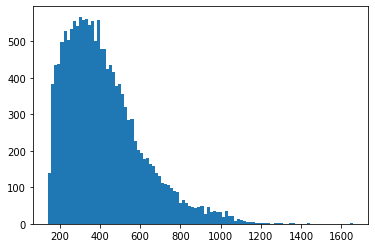

In [17]:
# Looking into the train lenghts of the txt files 
plt.hist(train_lens , bins = 100)
plt.show()

We have tokenized our text within the length 1024 and we could prolly explore other widths between 512 and 1024 also. 

Using the smaller stride breaks a single text into multiple chunks. Also using larger seq len leads to larger model. 

In [18]:
# Creating the targets 
targets = np.zeros((len(ids) , MAX_LEN , 15) , dtype = 'int32')
#targets.shape

for k in range(7):
  targets[: , : , 2*k] = targets_b[k] # start token
  targets[: , : , 2*k+1] = targets_i[k] # every other token 

targets[: , : , 14] = 1-np.max(targets , axis = -1)

targets.shape

(15594, 1024, 15)

Before the targets were full of zeros and we know updated the targets array with our start and rest of the span tokens. 

In [19]:
# Decoding the input tokens back to text 
tokenizer.decode(random.choice(train_tokens))

"<s>There shouldn't be a discussion when it comes to texting and driving for obvious reasons. It's just as dangerous as driving under the influence. And there are plenty of ways to send a message using hands free technology. It also being illegal should really mean that you shouldn't be doing it. And you can also kill someone just to send a text message. But it is common in the United States.\n\nTexting and driving has been banned in most of the United States there are only 2 states that haven't banned texting and driving. And of you get caught by a cop you will be fined up to $400. And that is a lot of money for just sending a text. And may also cause your license to get suspended. It makes sense because when you text and drive you are twenty three percent more likely to get into a car crash. That makes just as dangerous as driving under the influence.\n\nA lot of people don't actually know how dangerous and common texting and driving really is. It makes up eighteen percent of fatal c

In [20]:
# Looking into the targets 
targets

array([[[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       ...,

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [21]:
# Storing all the variables 
np.save(f'targets{MAX_LEN}' , targets)
np.save(f'tokens{MAX_LEN}' , train_tokens)
np.save(f'attention{MAX_LEN}' , train_attention)
print('Saved NER Tokens')

Saved NER Tokens


In [22]:
# Move the tokens into a folder

# !mv -t /content/drive/MyDrive/Kaggle_Competition/feedback_prize_eval/ner_tokens  /content/attention1024.npy /content/targets1024.npy /content/tokens1024.npy


# Perhaps we can load this using the below code 
# file_name =  np.load(filepath)

### Building a model 

- Will use longformer as a backbone 
- Add our NER head using one hidden layer of size `228`
- One final layer with a softmax 

We use 15 classes in here because we split our labels into 14 classes, 
- `B` class 7 labels
- `I` class 7 labels
- additional class called `0` class that doesn't belong to any of the 14 classes. 

In [23]:
# Building a model 

def build_model():

  # Input layer for our tokens and attention masks
  tokens = layers.Input(shape = (MAX_LEN , ) , name = 'tokens' , dtype = tf.int32)
  attention = layers.Input(shape = (MAX_LEN ,) , name = 'attention', dtype = tf.int32)

  # Downloading the Configuration file for the pretained model 
  config = AutoConfig.from_pretrained('model' + '/config.json')

  # Initiating the backbone of the longformer 
  backbone = TFAutoModel.from_pretrained('model' + '/tf_model.h5' , config = config)

  # Passing the tokens and attention into the backbone 
  x = backbone(tokens , attention_mask = attention)

  # Only pass the x[0]
  
  # Dense layer and output layer 
  x = layers.Dense(256 , activation = 'relu')(x[0])
  x = layers.Dense(15 , activation = 'softmax' )(x)

  # Packing into a model 
  model = tf.keras.Model(inputs = [tokens , attention] , outputs = x)

  # Compiling the model 
  model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4) , 
                loss = tf.keras.losses.CategoricalCrossentropy() , 
                metrics = [tf.keras.metrics.CategoricalAccuracy()])
  
  return model



In [24]:
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
  model = build_model()


# Model summary 
model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


All model checkpoint layers were used when initializing TFLongformerModel.

All the layers of TFLongformerModel were initialized from the model checkpoint at model/tf_model.h5.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
b = TFAutoModel.from_pretrained('model' + '/tf_model.h5' , config = config)

All model checkpoint layers were used when initializing TFLongformerModel.

All the layers of TFLongformerModel were initialized from the model checkpoint at model/tf_model.h5.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.
